In [1]:
%%HTML
<style>
p {
    color: #343a40;
}

h1 a.anchor-link {
    color: #F7ECCB;
}

h1 {
    background-color: #343a40;
    width: fit-content;
    padding: 15px;
    color: white;
    text-align: center;
    width: 100%;
}

.intro {
    width: 60%;
    margin: auto;
    text-align: justify !important;
    font-family: Georgia;
}

.output_png {
    display: flex;
    align-items: center;
    justify-content: center;
}

.hide_btn {
    background-color: #343a40;
    padding: 15px;
    color: white;
    border-radius: 30px;
    border: none;
}
</style>

In [2]:
%%HTML
<script>
    code_show=true;
    function code_toggle() {
         if (code_show){
             $('div.input').hide();
         } else {
             $('div.input').show();
         }
         code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
    <input class='hide_btn' type="submit"
    value="Toggle code">
</form>

In [3]:
import os
os.environ['SKIMAGE_DATADIR'] = '/tmp/.skimage_cache'

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [155]:
from skimage.io import imread, imshow
from skimage.transform import downscale_local_mean
from skimage.color import rgb2gray, rgb2hsv, gray2rgb
from skimage import img_as_ubyte, img_as_float
from skimage.exposure import histogram, cumulative_distribution
from skimage.morphology import closing, opening, area_closing, area_opening, erosion, dilation

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.stats import norm
from scipy.signal import convolve2d

# Chapter 3: The lines of his heart

<p class='intro'><br>Dear diary,<br>
Dear Diary,
I saw him at the coffee shop again today. I didn’t get to snap a new pic though, unfortunately. I wasn’t able to muster up the courage to approach him. He left before I could talk to him. I scurried over to his table after he left, and I saw that he left a receipt. I picked it up. Maybe I can learn something from this.
</p>
<p class='intro'><i>I want to know more about his life.</i></p>

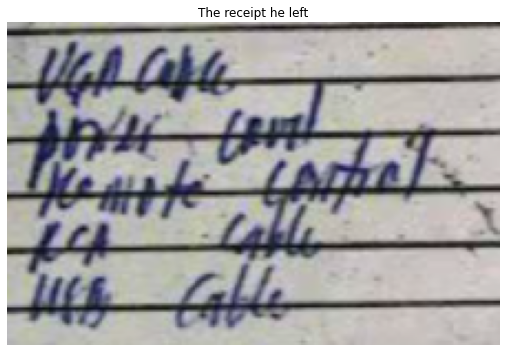

In [10]:
receipt = imread('images/receipt2.png')
plt.figure(figsize=(20, 5))
plt.axis('off')
plt.title('The receipt he left')
plt.tight_layout()
plt.imshow(receipt);

First, I need to binarize the image, turn it into black and white. I can do this by getting the image into its gray version, then applying a threshold.

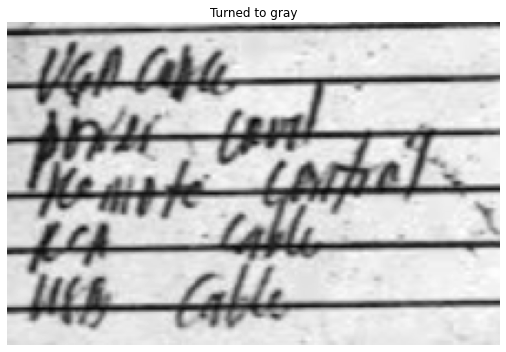

In [14]:
receipt_gray = rgb2gray(receipt)
plt.figure(figsize=(20, 5))
plt.axis('off')
plt.title('Turned to gray')
plt.tight_layout()
plt.imshow(receipt_gray, cmap='gray');

Since the clipped image of his receipt was already black against white, I just did some trial and error on the threshold value to get the output I wanted.

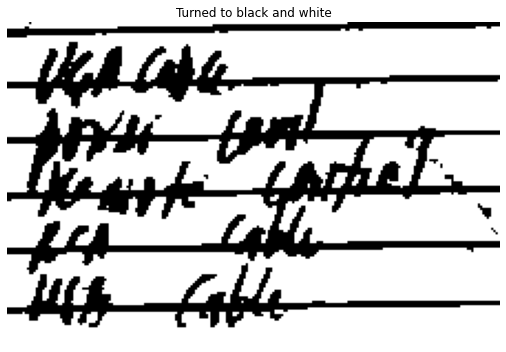

In [47]:
receipt_mask = receipt_gray > 0.5
receipt_bw = receipt_mask*1
plt.figure(figsize=(20, 5))
plt.axis('off')
plt.title('Turned to black and white')
plt.tight_layout()
plt.imshow(receipt_bw, cmap='gray');

And now, the tricky part. How do I isolate the text? Well, one way to do it could be to isolate the lines first. . .

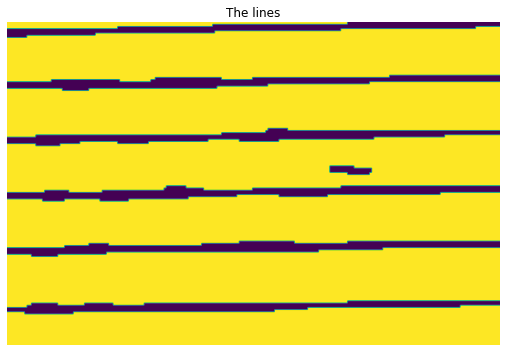

In [129]:
kernel = np.array([[1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0],
                   [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1]])
lines = opening(closing(receipt_mask*1, kernel),kernel)
plt.figure(figsize=(20, 5))
plt.axis('off')
plt.title('The lines')
plt.tight_layout()
plt.imshow(lines);

Then subtract the lines from the black and white image! Isolating the lines took some effort! It was hard to find a kernel that provided the right shape for the closing and opening operations.

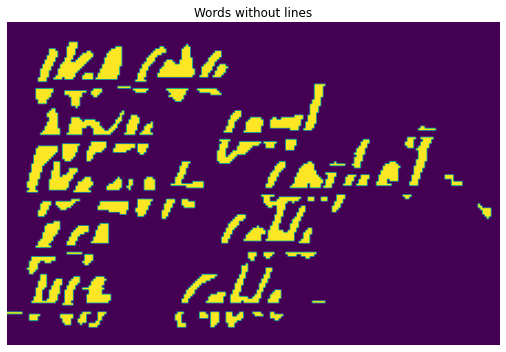

In [131]:
no_lines = abs((receipt_bw)-lines)
cleaned_no_lines = area_opening(area_closing(no_lines,6),6)
plt.figure(figsize=(20, 5))
plt.axis('off')
plt.title('Words without lines')
plt.tight_layout()
plt.imshow(cleaned_no_lines);

Next, we’ve got to fill in the gaps that removing those lines left. The image with the lines removed was cleaned up first, and now, more morphological operations. . .

And. . . done! It's pretty hard to make out, but it seems he's been buying different kinds of cables. I wonder what for? This is driving me crazy.

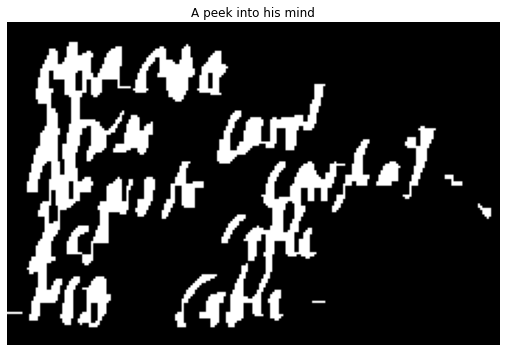

In [134]:
kernel = np.ones((7,2))
text = closing(cleaned_no_lines*1, kernel)
plt.figure(figsize=(20, 5))
plt.axis('off')
plt.title('A peek into his mind')
plt.tight_layout()
plt.imshow(text, cmap='gray');

I need to see his face again. I take a quick look at his social media and grab another photo.

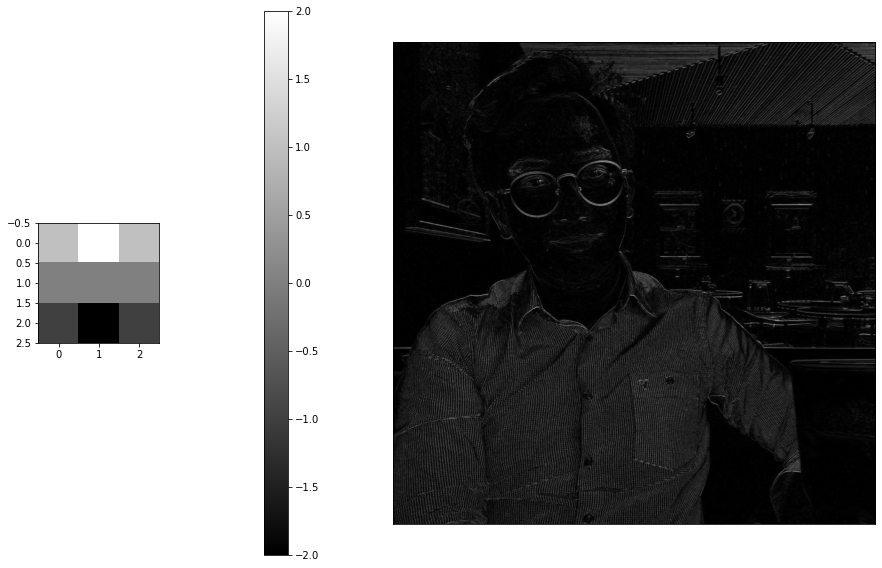

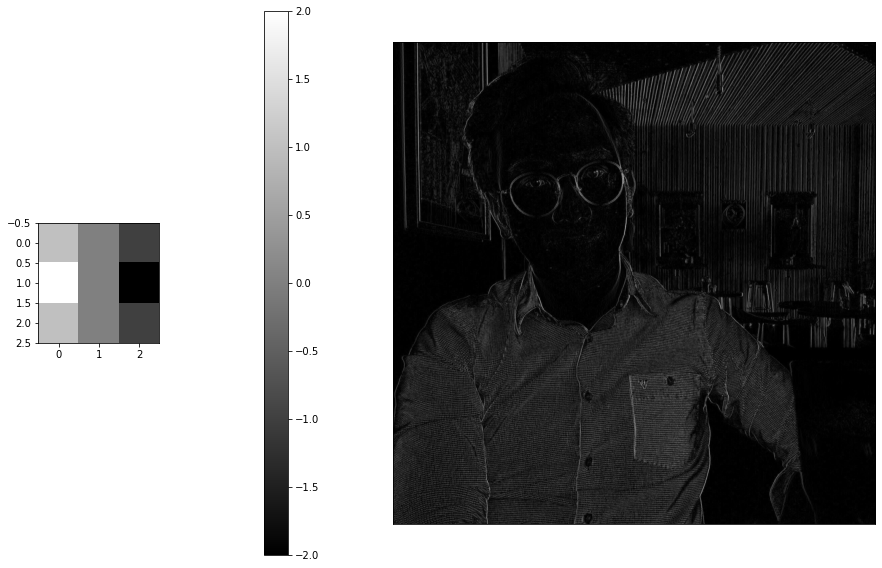

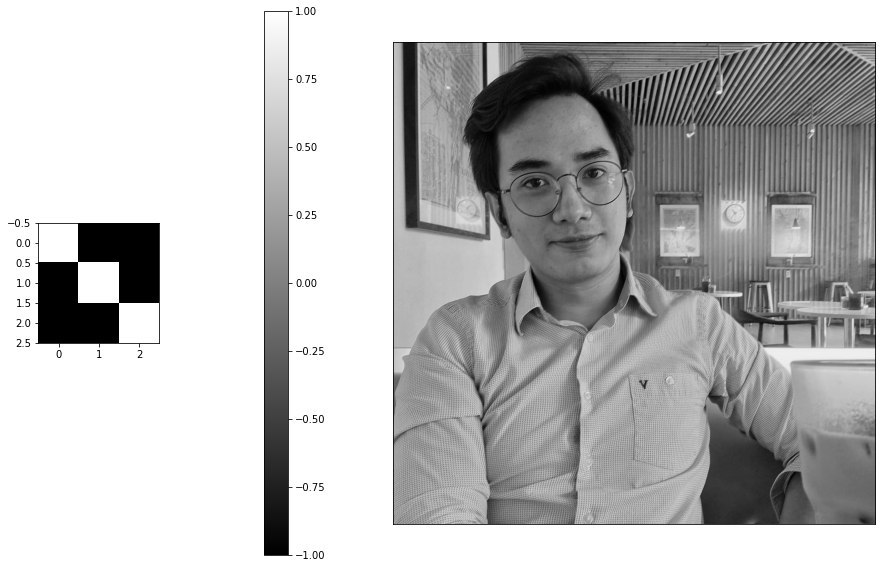

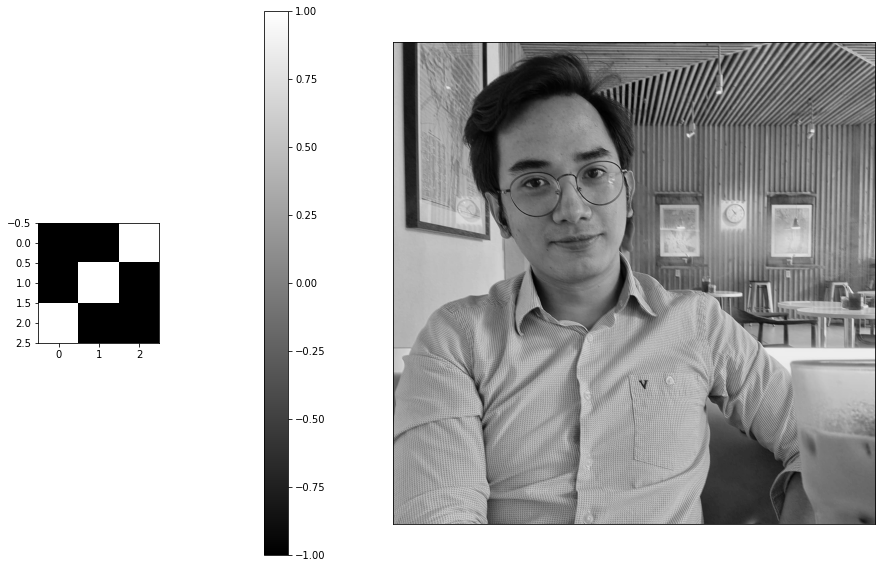

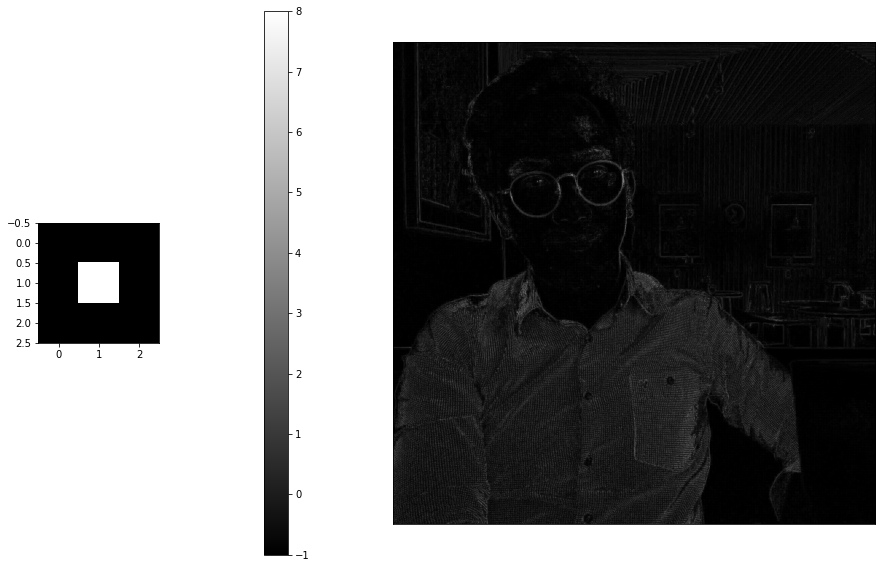

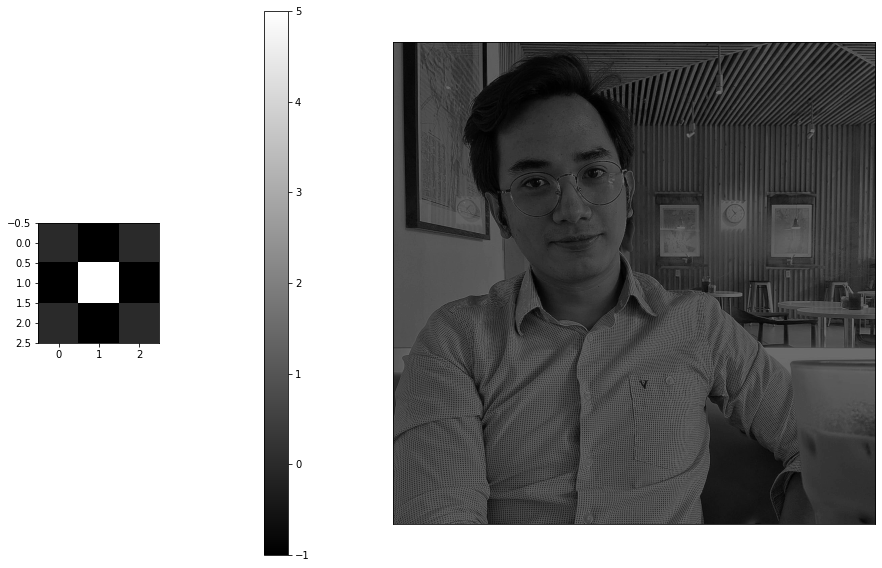

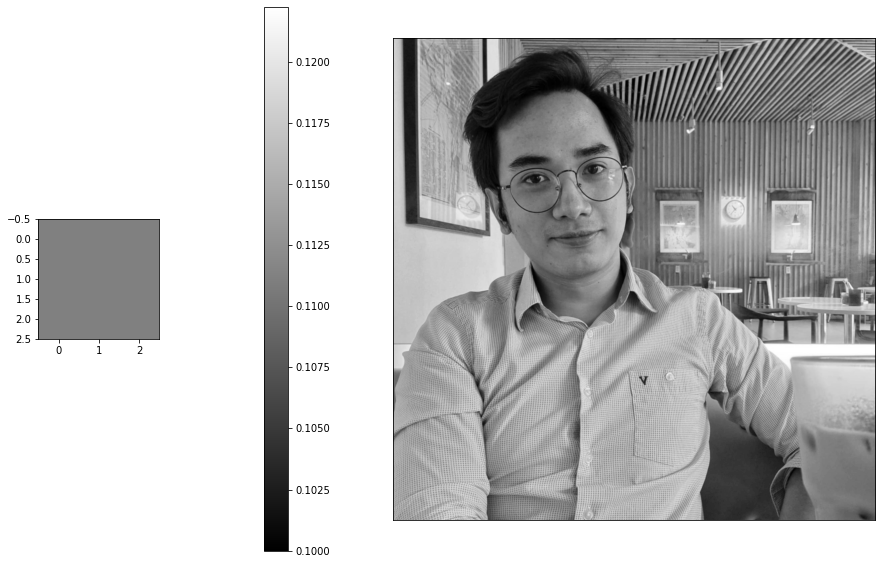

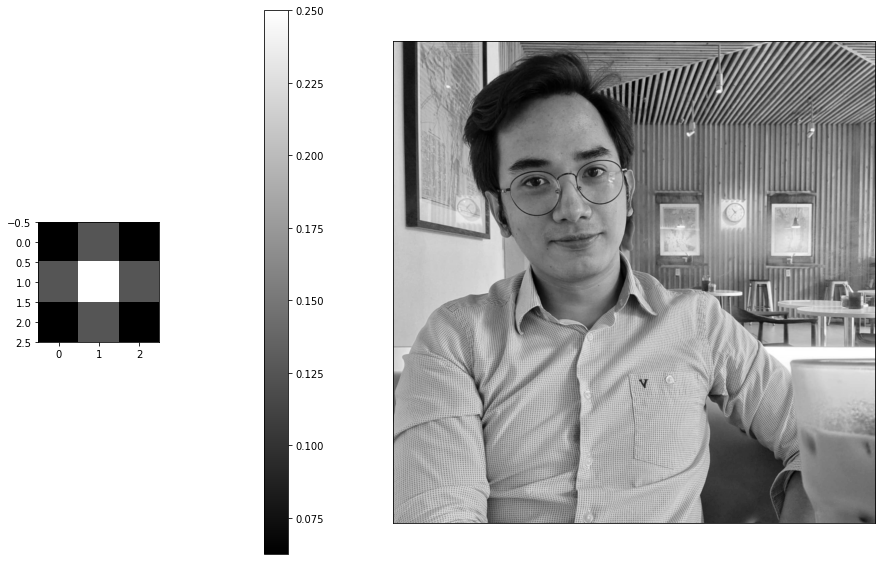

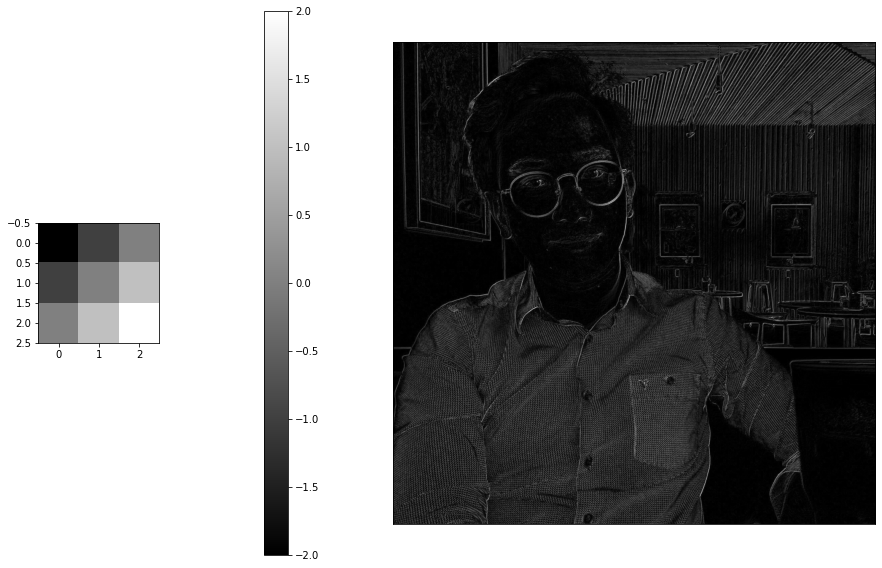

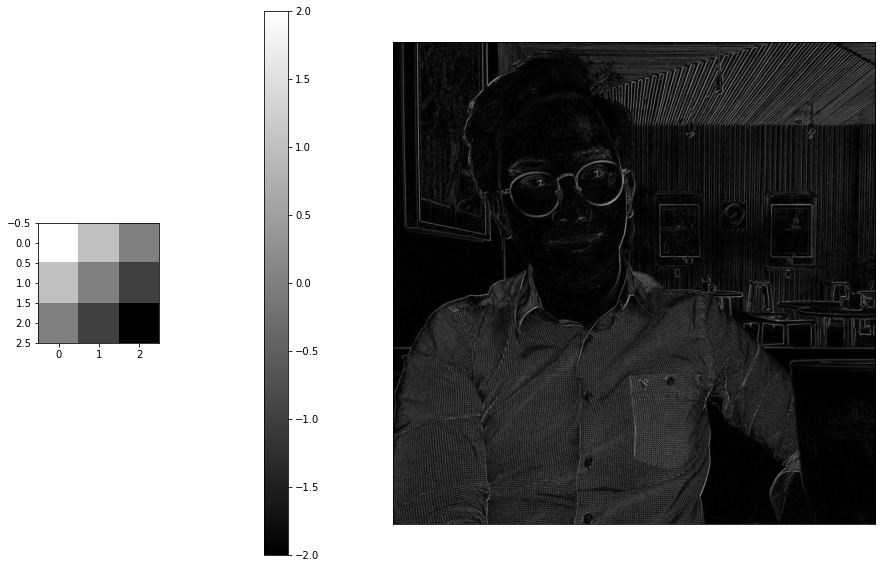

In [146]:
ch3 = rgb2gray(imread('images/ch3.jpg'))
# Sobel Operators
# Horizontal Sobel Filter
kernel1 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# Vertical Sobel Filter
kernel2 = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

# Left Diagonal Filter
kernel3 = np.array([[1, -1, -1],
                    [-1, 1, -1],
                    [-1, -1, 1]])

# Right Diagonal Filter
kernel4 = np.array([[-1, -1, 1],
                    [-1, 1, -1],
                    [1, -1, -1]])

# Edge Detection
kernel5 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

# Sharpen
kernel6 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

# Box Blur
kernel7 = (1 / 9.0) * np.array([[1., 1., 1.],
                                [1., 1., 1.],
                                [1., 1., 1.]])

# Gaussian Blur
kernel8 = (1 / 16.0) * np.array([[1., 2., 1.],
                                 [2., 4., 2.],
                                 [1., 2., 1.]])

# Left Diagonal Sobel Filter
kernel9 = np.array([[-2, -1, 0],
                    [-1, 0, 1],
                    [0, 1, 2]])

# Right Diagonal Sobel Filter
kernel10 = np.array([[2, 1, 0],
                    [1, 0, -1],
                    [0, -1, -2]])

def show_filter_effects(kernel, kernel_name=''):
    conv_im = convolve2d(ch3, kernel, 'valid')
    fig, ax = plt.subplots(1,3, gridspec_kw=dict(width_ratios=(5,1,20), wspace=0.5), figsize=(15,10))
    kern = ax[0].imshow(kernel, cmap='gray')
    fig.colorbar(kern, cax=ax[1])
    fig.suptitle(kernel_name)
    ax[2].imshow(abs(conv_im), cmap='gray')
    ax[2].set_xticks([]);
    ax[2].set_yticks([]);
    
kernels = [kernel1, kernel2, kernel3, kernel4, kernel5,
       kernel6, kernel7, kernel8, kernel9, kernel10]

[show_filter_effects(kernel) for kernel in kernels];

It's like he's there, but he's not. So close, and yet so far. Just within reach, and just out of it. I can barely make out the lines that these Sobel filters are making. Horizontal, vertical, all kinds of filters. Is this a sign from the universe? That I should only gaze at him from afar? I don't think I can accept that.

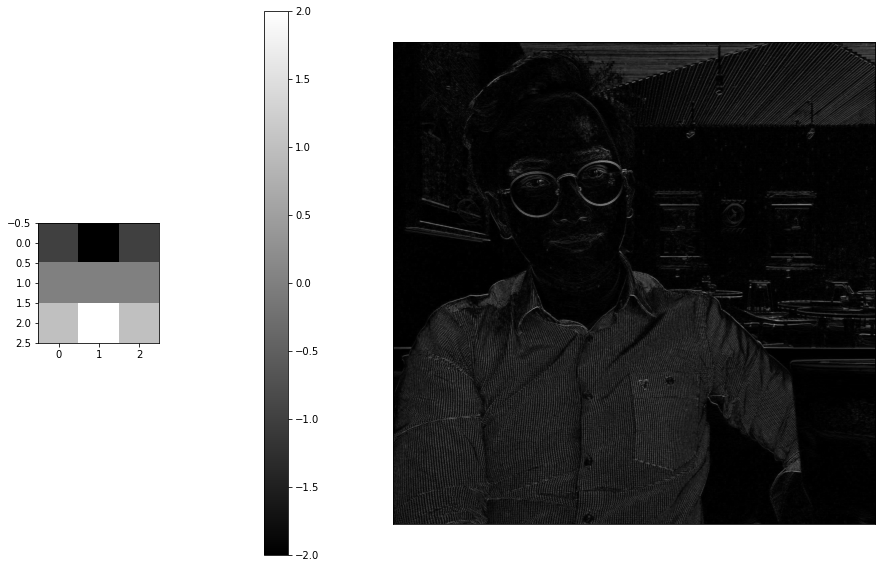

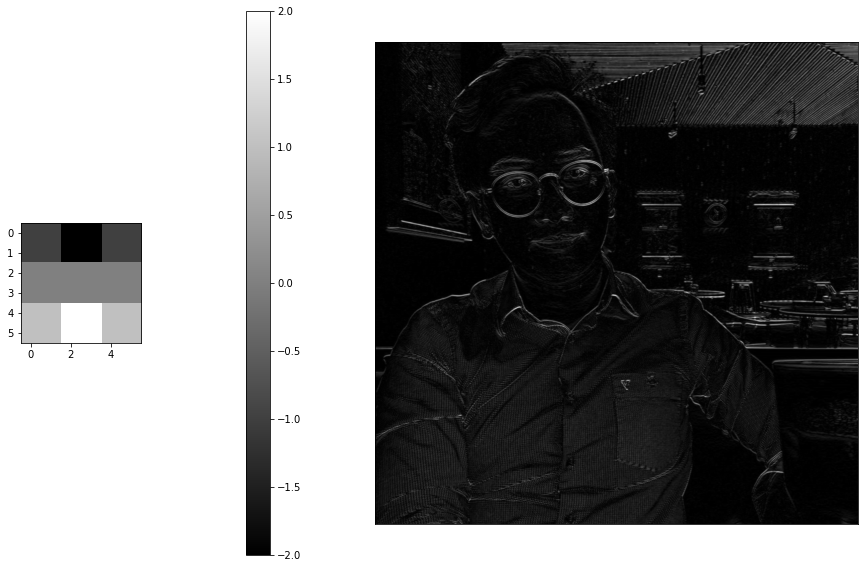

In [149]:
kernel_smaller = np.array([[-1, -2, -1],
                          [0, 0, 0],
                          [1, 2, 1]])
kernel_bigger = np.array([[-1, -1, -2, -2, -1, -1],
                          [-1, -1, -2, -2, -1, -1],
                          [0, 0, 0, 0, 0, 0],
                          [0, 0, 0, 0, 0, 0],
                          [1, 1, 2, 2, 1, 1],
                          [1, 1, 2, 2, 1, 1]])

show_filter_effects(kernel_smaller)
show_filter_effects(kernel_bigger)

And the bigger the kernel I make, the more detail is lost from his image. The lines become sharper, and the background fades away.

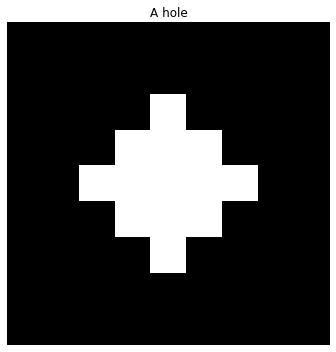

In [152]:
im1 = np.array([[0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0],
                [0,0,0,0,1,0,0,0,0],
                [0,0,0,1,1,1,0,0,0],
                [0,0,1,1,1,1,1,0,0],
                [0,0,0,1,1,1,0,0,0],
                [0,0,0,0,1,0,0,0,0],
                [0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0]])
plt.figure(figsize=(20, 5))
plt.axis('off')
plt.title('A hole')
plt.tight_layout()
plt.imshow(im1, cmap='gray');

How can I turn this hole in my life. . .

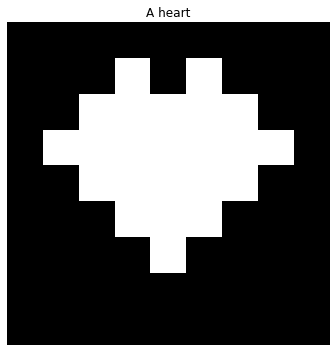

In [159]:
elem = np.array([[0, 0, 0],
                [0, 1, 0],
                [1, 0, 1]])

plt.figure(figsize=(20, 5))
plt.axis('off')
plt.title('A heart')
plt.tight_layout()
plt.imshow(dilation(im1, elem), cmap='gray');

. . . into a heart.

<p class='intro'>He remains an enigma to me. But little by little, I’m learning more and more. I wonder, when will the lines of our paths cross again? It could be tomorrow, it could be never, I suppose. Such is life. But this guy, I can’t let go. I’ll be taking this into my own hands. I'll be taking his heart into my own hands.</p>
<p class='intro'><i>I’ll be seeing him again. xoxo</i></p>